In [2]:
!pip install nltk spacy scikit-learn pandas matplotlib
!python -m spacy download en_core_web_sm

   ---------------------------------------- 0.0/11.8 MB ? eta -:--:--
   ------------ --------------------------- 3.7/11.8 MB 16.8 MB/s eta 0:00:01
   ----------------------- ---------------- 6.8/11.8 MB 16.1 MB/s eta 0:00:01
   ------------------------------------ --- 10.7/11.8 MB 16.0 MB/s eta 0:00:01
   ---------------------------------------- 11.8/11.8 MB 13.4 MB/s eta 0:00:00
   ---------------------------------------- 0.0/11.0 MB ? eta -:--:--
   --------------- ------------------------ 4.2/11.0 MB 19.3 MB/s eta 0:00:01
   --------------------------- ------------ 7.6/11.0 MB 17.4 MB/s eta 0:00:01
   -------------------------------------- - 10.5/11.0 MB 15.9 MB/s eta 0:00:01
   ---------------------------------------- 11.0/11.0 MB 14.0 MB/s eta 0:00:00
   ---------------------------------------- 0.0/1.9 MB ? eta -:--:--
   ---------------------------------------- 1.9/1.9 MB 9.6 MB/s eta 0:00:00
   ---------------------------------------- 0.0/1.5 MB ? eta -:--:--
   ---------------

  You can safely remove it manually.
  You can safely remove it manually.
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
gensim 4.3.3 requires numpy<2.0,>=1.18.5, but you have numpy 2.0.2 which is incompatible.


     ---------------------------------------- 0.0/12.8 MB ? eta -:--:--
     ----- ---------------------------------- 1.8/12.8 MB 11.2 MB/s eta 0:00:01
     --------- ------------------------------ 3.1/12.8 MB 8.0 MB/s eta 0:00:02
     ------------- -------------------------- 4.2/12.8 MB 9.0 MB/s eta 0:00:01
     ------------- -------------------------- 4.2/12.8 MB 9.0 MB/s eta 0:00:01
     ------------- -------------------------- 4.5/12.8 MB 4.5 MB/s eta 0:00:02
     ---------------------- ----------------- 7.1/12.8 MB 5.7 MB/s eta 0:00:02
     ----------------------------- ---------- 9.4/12.8 MB 6.5 MB/s eta 0:00:01
     ---------------------------------------  12.6/12.8 MB 7.5 MB/s eta 0:00:01
     ---------------------------------------- 12.8/12.8 MB 7.1 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')


In [1]:
import pandas as pd
import re
from collections import Counter, defaultdict
from sklearn.feature_extraction.text import CountVectorizer
import matplotlib.pyplot as plt
from wordcloud import WordCloud


In [2]:
# Set larger font sizes for all plot elements
plt.rcParams.update({'font.size': 14})

In [3]:
data = pd.read_csv(r'C:\Users\paris\OneDrive\thesis\collect data\Analysis\data processing\Cleaned_Instagram-comments3.csv')

# Convert the 'Lemmatized_Comments' column to a list
text_data = data['Lemmatized_Comments'].dropna().tolist()


In [4]:
# Create a CountVectorizer to extract top keywords
vectorizer = CountVectorizer(max_features=100, ngram_range=(1, 2))
X = vectorizer.fit_transform(text_data)

# Show top keywords
Top_keywords = vectorizer.get_feature_names_out()
print("Top Keywords:", Top_keywords)

Top Keywords: ['all' 'amaze' 'amazing' 'awesome' 'back' 'balm' 'beautiful' 'beauty'
 'best' 'brand' 'but' 'buy' 'cant' 'cant wait' 'care' 'color' 'cream'
 'curious' 'cute' 'definitely' 'deodorant' 'dont' 'fairtradeskincare'
 'fantastic' 'fit' 'get' 'give' 'go' 'good' 'gorgeous' 'great' 'hair'
 'happy' 'idea' 'important' 'ingredient' 'keep' 'know' 'like' 'look'
 'love' 'lovely' 'make' 'many' 'message' 'much' 'must' 'name' 'need'
 'need try' 'never' 'news' 'nice' 'not' 'not wait' 'oh' 'oh wow' 'one'
 'order' 'packaging' 'people' 'perfect' 'plastic' 'pretty' 'price'
 'product' 'really' 'refill' 'refillable' 'reuse' 'safe' 'scent' 'service'
 'shampoo' 'share' 'shot' 'skin' 'small' 'soap' 'sound' 'sound like'
 'stock' 'store' 'stun' 'sure' 'sustainable' 'thank' 'thanks'
 'thanks share' 'think' 'try' 'use' 'wait' 'will' 'wonderful' 'work'
 'would' 'wow' 'yay' 'yes']


In [5]:
# Predefined root words
keywords_to_extract_sustainability = [
    "sustain", "refill", "waste", "animal", "cruelty", "vegan", "organi", "toxi", "plastic", "affordabl", "fair", "eco", "cleanbeauty", "zero", 
    "ethic", "packag", "test", "reus", "green", "recycl", "micro", "mica", "bio", "compos", "chemic", "earth", "environ", "safe", "preservative",
    "emission", "child labor", "circular", "fragrance", "fossil", "child min", "hire child", "hard job min", "voiceless child", "ingredient", "heavy metal", 
    "bacteri", "poison", "unsanitiz", "green wash", "allergic", "synthetic", "alternativ", "source", "natraul", "econom", "health", "consumeris", 
    "illegal", "Sulfate", "Paraben", "energy", "licens", "verif", "leapin", "value", "durable", "cost", "leap bunny", "palmoilfree", "conscious", 
    "naturalbeauty", "natural", "planet", "gogreen", "gluten free", "climate", "emission", "fragrance", "harmful", "reduce", "overconsumpt",
    "tree plant", "no plastic", "none plastic", "tree conservation", "plant", "cleanestskincar", "cleanbeaut"
]

# Function to count keyword occurrences and collect matches
def count_keywords_with_matches(text, keyword_list):
    text = text.lower()  # Convert text to lowercase
    matches_dict = defaultdict(list)
    counts = Counter()
    for keyword in keyword_list:
        # Use regex to find all variations containing the root word
        matches = re.findall(rf'\b{keyword}\w*\b', text)
        if matches:  # Only record if matches are found
            counts[keyword] = len(matches)
            matches_dict[keyword].extend(matches)
    return counts, matches_dict

#  text data 
text_data = data['Lemmatized_Comments'].dropna().tolist()

# Initialize counters
keyword_counts = Counter()
keyword_matches = defaultdict(list)

# Process each document in the dataset
for doc in text_data:
    counts, matches = count_keywords_with_matches(doc, keywords_to_extract_sustainability)
    keyword_counts.update(counts)
    for key, value in matches.items():
        keyword_matches[key].extend(value)

# Display aggregated keyword frequencies and matches
print("Keyword Frequencies:", dict(keyword_counts))
print("\nMatched Words for Each Keyword:")
for keyword, matches in keyword_matches.items():
    print(f"{keyword}: {matches}")

Keyword Frequencies: {'zero': 13, 'packag': 10, 'eco': 12, 'refill': 16, 'sustain': 20, 'vegan': 3, 'plastic': 10, 'cleanbeauty': 1, 'conscious': 2, 'cleanbeaut': 1, 'test': 2, 'waste': 4, 'cruelty': 5, 'naturalbeauty': 1, 'natural': 4, 'gogreen': 1, 'plant': 3, 'planet': 1, 'tree plant': 1, 'organi': 3, 'fair': 6, 'preservative': 2, 'palmoilfree': 1, 'tree conservation': 1, 'ethic': 5, 'ingredient': 4, 'compos': 3, 'earth': 2, 'environ': 3, 'recycl': 2, 'circular': 3, 'econom': 1, 'climate': 1, 'green': 1, 'reus': 8, 'reduce': 1, 'none plastic': 1, 'fragrance': 1, 'harmful': 2, 'chemic': 1, 'safe': 4, 'health': 2, 'alternativ': 1, 'leap bunny': 2, 'verif': 1, 'gluten free': 1, 'leapin': 1}

Matched Words for Each Keyword:
zero: ['zerowasteskincare', 'zerowastemakeup', 'zerowastecosmetics', 'zerowasteskincare', 'zerowasteliving', 'zerowaste', 'zerowastelifestyle', 'zerowaste', 'zerowastelifestyle', 'zerowastestore', 'zero', 'zerowasteskincare', 'zerowaste']
packag: ['packaging', 'packa

In [6]:
# Initialize counters and storage for matches
keyword_counts = Counter()
keyword_matches = defaultdict(list)

# Process each document in the dataset
for doc in text_data:
    counts, matches = count_keywords_with_matches(doc, keywords_to_extract_sustainability)
    keyword_counts.update(counts)
    for key, value in matches.items():
        keyword_matches[key].extend(value)

# Convert matched words for each keyword into a set
keyword_matches_set = {keyword: set(matches) for keyword, matches in keyword_matches.items()}

# Aggregate all unique words into a single set
all_unique_words_set = set().union(*keyword_matches_set.values())

# Convert the set of unique words into a list
all_unique_words_list = list(all_unique_words_set)

# Display the results
print("Keyword Frequencies:", dict(keyword_counts))
print("\nUnique Matched Words for Each Keyword:")
for keyword, matches in keyword_matches_set.items():
    print(f"{keyword}: {matches}")

print("\nAll Unique Words (as a list):")
print(all_unique_words_list)


Keyword Frequencies: {'zero': 13, 'packag': 10, 'eco': 12, 'refill': 16, 'sustain': 20, 'vegan': 3, 'plastic': 10, 'cleanbeauty': 1, 'conscious': 2, 'cleanbeaut': 1, 'test': 2, 'waste': 4, 'cruelty': 5, 'naturalbeauty': 1, 'natural': 4, 'gogreen': 1, 'plant': 3, 'planet': 1, 'tree plant': 1, 'organi': 3, 'fair': 6, 'preservative': 2, 'palmoilfree': 1, 'tree conservation': 1, 'ethic': 5, 'ingredient': 4, 'compos': 3, 'earth': 2, 'environ': 3, 'recycl': 2, 'circular': 3, 'econom': 1, 'climate': 1, 'green': 1, 'reus': 8, 'reduce': 1, 'none plastic': 1, 'fragrance': 1, 'harmful': 2, 'chemic': 1, 'safe': 4, 'health': 2, 'alternativ': 1, 'leap bunny': 2, 'verif': 1, 'gluten free': 1, 'leapin': 1}

Unique Matched Words for Each Keyword:
zero: {'zerowastelifestyle', 'zerowaste', 'zerowastestore', 'zerowastecosmetics', 'zero', 'zerowastemakeup', 'zerowasteskincare', 'zerowasteliving'}
packag: {'packaging'}
eco: {'ecofriendlyskincare', 'ecomindedchildhood', 'ecofriendly', 'eco', 'ecofriendlyprod

In [7]:
# Predefined keywords
keywords_to_extract_product_feature = [
    "soft", "cute", "scent", "fresh", "brand", "labour", "pretty", "perfect", "stunning","coverag", "beauty",
    "color", "colour", "delicate", "beautiful", "lable", "aesthetic", "ingredient", "packaging", "name", "formulation", 
    "matte", "pic", "amazing look", "content", "idea", "saver", "exfoliating", "smell", "rustic look", "skin type", 
    "texture", "shot", "formulat", "shade", "gorgeous", "price", "container", "look great", "practical", "size", "safe", "beneficial", "health", "lightweight",
    "formula", "soothing", "collection", "design", "result", "value", "packaging", "last", "reasonable", "worthwhile",
    "reliable", "dependable", "essential", "fragile", "ineffective", "expensive", "cheap", "overpric", "disappointment", "damage", 
    "irritation", "scent", "simple", "performance", "quality", "shipment", "container", "ingredient", "availabilit", "price", "cost", "brightene", 
    "softene", "pure", "enhance", "nourishing", "worth", "longlast", "gentle", "effecti", "luxur", "perfect", "hydratin", "improvement", "fragrance", 
    "overwhelm", "pleasant", "durable", "bottle", "jar", "lid", "tube", "moisturize", "blendabl", "glow", "absorb", "molecular", "long", 
    "hydrati", "comedo", "sensitiv", "oily", "dry", "esthetician", "money" 
]

# Function to count keyword occurrences and collect matches
def count_keywords_with_matches(text, keyword_list):
    text = text.lower()  # Convert text to lowercase
    matches_dict = defaultdict(list)
    counts = Counter()
    for keyword in keyword_list:
        # Use regex to find all variations containing the root word
        matches = re.findall(rf'\b{keyword}\w*\b', text)
        if matches:  # Only record if matches are found
            counts[keyword] = len(matches)
            matches_dict[keyword].extend(matches)
    return counts, matches_dict
    

text_data = data['Lemmatized_Comments'].dropna().tolist()

# Initialize counters
keyword_counts2 = Counter()
keyword_matches2 = defaultdict(list)

# Process each document in the dataset
for doc in text_data:
    counts, matches = count_keywords_with_matches(doc, keywords_to_extract_product_feature)
    keyword_counts2.update(counts)
    for key, value in matches.items():
        keyword_matches2[key].extend(value)

# Display aggregated keyword frequencies and matches
print("Keyword Frequencies:", dict(keyword_counts2))
print("\nMatched Words for Each Keyword:")
for keyword, matches in keyword_matches2.items():
    print(f"{keyword}: {matches}")


Keyword Frequencies: {'soft': 2, 'perfect': 8, 'pretty': 9, 'labour': 1, 'color': 7, 'beautiful': 19, 'scent': 4, 'delicate': 2, 'cute': 6, 'fresh': 3, 'packaging': 10, 'brand': 15, 'result': 1, 'content': 1, 'name': 4, 'idea': 6, 'saver': 1, 'exfoliating': 1, 'smell': 3, 'rustic look': 1, 'skin type': 1, 'beauty': 10, 'texture': 3, 'gorgeous': 8, 'shade': 2, 'colour': 2, 'irritation': 1, 'glow': 1, 'formulat': 2, 'formula': 3, 'shot': 4, 'aesthetic': 1, 'ingredient': 4, 'size': 2, 'pic': 2, 'worth': 1, 'price': 4, 'reliable': 1, 'bottle': 4, 'last': 1, 'fragrance': 1, 'formulation': 1, 'container': 4, 'look great': 3, 'matte': 1, 'amazing look': 1, 'safe': 4, 'beneficial': 1, 'health': 2, 'quality': 1, 'practical': 1, 'lightweight': 1, 'moisturize': 1, 'collection': 1, 'design': 2}

Matched Words for Each Keyword:
soft: ['soft', 'soft']
perfect: ['perfect', 'perfect', 'perfect', 'perfect', 'perfect', 'perfect', 'perfect', 'perfect', 'perfect', 'perfect', 'perfect', 'perfect', 'perfect

In [8]:
# Convert matched words for each keyword into a set
keyword_matches_set2 = {keyword: set(matches) for keyword, matches in keyword_matches2.items()}

# Aggregate all unique words into a single set
all_unique_words_set2 = set().union(*keyword_matches_set2.values())

# Convert the set of unique words into a list
all_unique_words_list2 = list(all_unique_words_set2)

# Display the results
print("Keyword Frequencies2:", dict(keyword_counts2))
print("\nUnique Matched Words for Each Keyword:")
for keyword, matches in keyword_matches_set2.items():
    print(f"{keyword}: {matches}")

print("\nAll Unique Words (as a list):")
print(all_unique_words_list2)



Keyword Frequencies2: {'soft': 2, 'perfect': 8, 'pretty': 9, 'labour': 1, 'color': 7, 'beautiful': 19, 'scent': 4, 'delicate': 2, 'cute': 6, 'fresh': 3, 'packaging': 10, 'brand': 15, 'result': 1, 'content': 1, 'name': 4, 'idea': 6, 'saver': 1, 'exfoliating': 1, 'smell': 3, 'rustic look': 1, 'skin type': 1, 'beauty': 10, 'texture': 3, 'gorgeous': 8, 'shade': 2, 'colour': 2, 'irritation': 1, 'glow': 1, 'formulat': 2, 'formula': 3, 'shot': 4, 'aesthetic': 1, 'ingredient': 4, 'size': 2, 'pic': 2, 'worth': 1, 'price': 4, 'reliable': 1, 'bottle': 4, 'last': 1, 'fragrance': 1, 'formulation': 1, 'container': 4, 'look great': 3, 'matte': 1, 'amazing look': 1, 'safe': 4, 'beneficial': 1, 'health': 2, 'quality': 1, 'practical': 1, 'lightweight': 1, 'moisturize': 1, 'collection': 1, 'design': 2}

Unique Matched Words for Each Keyword:
soft: {'soft'}
perfect: {'perfect'}
pretty: {'pretty'}
labour: {'labour'}
color: {'color'}
beautiful: {'beautifully', 'beautiful'}
scent: {'scent'}
delicate: {'delic

In [9]:
# List of keywords to match
keywords = list(set(all_unique_words_list))

# Function to find rows with at least one keyword match and count them
def find_matching_rows_with_stats(data, keywords):
    matching_rows = []
    for index, comment in data['Lemmatized_Comments'].items():
        if any(re.search(rf'\b{keyword}\b', comment.lower()) for keyword in keywords):
            matching_rows.append(index)
    return matching_rows

# Get rows with matches
matching_rows = find_matching_rows_with_stats(data, keywords)

# Count the number of rows found
num_matching_rows = len(matching_rows)

# Total number of rows in the dataset
total_rows = len(data)

# Calculate the percentage of rows with at least one match
percentage_matching_rows = (num_matching_rows / total_rows) * 100

# Display results
print(f"Total number of rows: {total_rows}")
print(f"Number of rows with at least one keyword match: {num_matching_rows}")
print(f"Percentage of rows with at least one keyword match: {percentage_matching_rows:.2f}%")



Total number of rows: 416
Number of rows with at least one keyword match: 65
Percentage of rows with at least one keyword match: 15.62%


In [10]:
# List of keywords to match
keywords = list(set(all_unique_words_list2))


# Function to find rows with at least one keyword match and count them
def find_matching_rows_with_stats(data, keywords):
    matching_rows = []
    for index, comment in data['Lemmatized_Comments'].items():
        if any(re.search(rf'\b{keyword}\b', comment.lower()) for keyword in keywords):
            matching_rows.append(index)
    return matching_rows

# Get rows with matches
matching_rows = find_matching_rows_with_stats(data, keywords)

# Count the number of rows found
num_matching_rows = len(matching_rows)

# Total number of rows in the dataset
total_rows = len(data)

# Calculate the percentage of rows with at least one match
percentage_matching_rows2 = (num_matching_rows / total_rows) * 100

# Display results
print(f"Total number of rows: {total_rows}")
print(f"Number of rows with at least one keyword match: {num_matching_rows}")
print(f"Percentage of rows with at least one keyword match: {percentage_matching_rows2:.2f}%")



Total number of rows: 416
Number of rows with at least one keyword match: 128
Percentage of rows with at least one keyword match: 30.77%


In [12]:

# Function to check if any keyword from a category exists in a comment
def contains_keywords(text, keywords):
    text = text.lower()
    return any(re.search(rf'\b{keyword}\w*\b', text) for keyword in keywords)

# Count comments related to each category
sustainability_count = sum(keyword_counts.values())
feature_count = sum(keyword_counts2.values())

# Total number of comments
total_comments = len(text_data)

# results (percentage of total comments)
sustainability_percentage = (sustainability_count / total_comments) * 100 
feature_percentage = (feature_count / total_comments) * 100

# Display results
print(f"Total number of sustainability-related comments: {sustainability_count}")
print(f"Total number of product feature-related comments: {feature_count}")
print(f"Percentage of comments caring about sustainable products: {sustainability_percentage:.2f}%")
print(f"Percentage of comments concerning product features: {feature_percentage:.2f}%")


Total number of sustainability-related comments: 174
Total number of product feature-related comments: 186
Percentage of comments caring about sustainable products: 41.83%
Percentage of comments concerning product features: 44.71%


In [13]:
# Predefined keywords
keywords_to_extract_Purchase_Intention = [

    "end ?", "back stock", "need", "would try", "charged", "stop", "Recommended", "cant wait", "not wait",
    "need try", "wholesale ?", "purchase", 'deal', "placed order", "soothing use", "great use",
    "first purchase", "definitely try", "not wait try", "definitely need", "curious try", "need get", "payment", 
    "would love try", "love try", "use", "first order", "online", "store", "grab", "looking for", "try", "pay", 
    "buy", "order", "acquire", "checkout", "payment", "in stock", "interest"
    
]

# Function to count keyword occurrences and collect matches
def count_keywords_with_matches(text, keyword_list):
    text = text.lower()  # Convert text to lowercase
    matches_dict = defaultdict(list)
    counts = Counter()
    for keyword in keyword_list:
        # Use regex to find all variations containing the root word
        matches = re.findall(rf'\b{keyword}\w*\b', text)
        if matches:  # Only record if matches are found
            counts[keyword] = len(matches)
            matches_dict[keyword].extend(matches)
    return counts, matches_dict

# text data 
text_data = data['Lemmatized_Comments'].dropna().tolist()

# Initialize counters
keyword_counts3 = Counter()
keyword_matches3 = defaultdict(list)

# Process each document in the dataset
for doc in text_data:
    counts, matches = count_keywords_with_matches(doc, keywords_to_extract_Purchase_Intention)
    keyword_counts3.update(counts)
    for key, value in matches.items():
        keyword_matches3[key].extend(value)

# Display aggregated keyword frequencies and matches
print("Keyword Frequencies:", dict(keyword_counts3))
print("\nMatched Words for Each Keyword:")
for keyword, matches in keyword_matches3.items():
    print(f"{keyword}: {matches}")


Keyword Frequencies: {'end ?': 2, 'back stock': 2, 'need': 19, 'need try': 8, 'try': 24, 'cant wait': 8, 'interest': 3, 'wholesale ?': 2, 'order': 7, 'not wait': 5, 'purchase': 2, 'first purchase': 1, 'not wait try': 2, 'buy': 6, 'definitely need': 4, 'use': 10, 'store': 5, 'would love try': 2, 'love try': 2, 'online': 2, 'stop': 2, 'pay': 3, 'deal': 1, 'curious try': 1, 'need get': 1, 'payment': 2}

Matched Words for Each Keyword:
end ?: ['end', 'end']
back stock: ['back stock', 'back stock']
need: ['need', 'need', 'need', 'need', 'need', 'need', 'need', 'need', 'need', 'need', 'need', 'need', 'need', 'need', 'need', 'need', 'need', 'need', 'need']
need try: ['need try', 'need try', 'need try', 'need try', 'need try', 'need try', 'need try', 'need try']
try: ['try', 'try', 'try', 'try', 'try', 'try', 'try', 'try', 'try', 'try', 'try', 'try', 'try', 'try', 'try', 'try', 'try', 'try', 'try', 'try', 'try', 'try', 'try', 'try']
cant wait: ['cant wait', 'cant wait', 'cant wait', 'cant wait

In [14]:

# Convert matched words for each keyword into a set
keyword_matches_set3 = {keyword: set(matches) for keyword, matches in keyword_matches3.items()}

# Aggregate all unique words into a single set
all_unique_words_set3 = set().union(*keyword_matches_set3.values())

# Convert the set of unique words into a list
all_unique_words_list3 = list(all_unique_words_set3)

# Display the results
print("Keyword Frequencies3:", dict(keyword_counts3))
print("\nUnique Matched Words for Each Keyword:")
for keyword, matches in keyword_matches_set3.items():
    print(f"{keyword}: {matches}")

print("\nAll Unique Words (as a list):")
print(all_unique_words_list3)


Keyword Frequencies3: {'end ?': 2, 'back stock': 2, 'need': 19, 'need try': 8, 'try': 24, 'cant wait': 8, 'interest': 3, 'wholesale ?': 2, 'order': 7, 'not wait': 5, 'purchase': 2, 'first purchase': 1, 'not wait try': 2, 'buy': 6, 'definitely need': 4, 'use': 10, 'store': 5, 'would love try': 2, 'love try': 2, 'online': 2, 'stop': 2, 'pay': 3, 'deal': 1, 'curious try': 1, 'need get': 1, 'payment': 2}

Unique Matched Words for Each Keyword:
end ?: {'end'}
back stock: {'back stock'}
need: {'need'}
need try: {'need try'}
try: {'try'}
cant wait: {'cant wait'}
interest: {'interest'}
wholesale ?: {'wholesale'}
order: {'order'}
not wait: {'not wait'}
purchase: {'purchase'}
first purchase: {'first purchase'}
not wait try: {'not wait try'}
buy: {'buyless', 'buy'}
definitely need: {'definitely need'}
use: {'userealstuff', 'use', 'useand'}
store: {'store'}
would love try: {'would love try'}
love try: {'love try'}
online: {'online'}
stop: {'stop'}
pay: {'pay', 'payment'}
deal: {'deal'}
curious try

In [15]:
# Predefined root words
keywords_to_extract_repurchase_recommand = [
    "tried", "havent tried", "Satisfaction", "satisf", "pleasant", "ended ?", "back stock", "charged", "Recommended",
    "may look", "ever get", "enjoyed", "made purchase", 'deal',
    "first purchase", "bought", "placed order", "soothing use", "great use", "started using", "using product", 
    "using", "recommand", "highly recommand", "next order", "last order", "first order", "purchasing",
    "buying", "have this", "have product", "payment", "interesting",
    "order", "checkout", "payment", "own", "in stock",
    "waste money", "repurchase", "order again", "buy again", "restock", "run out", "buy more", "next time"
]

data2 = pd.read_csv(r'C:\Users\paris\OneDrive\thesis\collect data\Cleaned_Instagram-comments.csv')

# Convert the 'Comments' column to a list
text_data2 = data2 ['Lemmatized_Comments'].dropna().tolist()


# Function to count keyword occurrences and collect matches
def count_keywords_with_matches(text, keyword_list):
    text = text.lower()  # Convert text to lowercase
    matches_dict = defaultdict(list)
    counts = Counter()
    for keyword in keyword_list:
        # Use regex to find all variations containing the root word
        matches = re.findall(rf'\b{keyword}\w*\b', text)
        if matches:  # Only record if matches are found
            counts[keyword] = len(matches)
            matches_dict[keyword].extend(matches)
    return counts, matches_dict


# Initialize counters
keyword_counts4 = Counter()
keyword_matches4 = defaultdict(list)

# Process each document in the dataset
for doc in text_data2:
    counts, matches = count_keywords_with_matches(doc, keywords_to_extract_repurchase_recommand)
    keyword_counts4.update(counts)
    for key, value in matches.items():
        keyword_matches4[key].extend(value)

# Display aggregated keyword frequencies and matches
print("Keyword Frequencies:", dict(keyword_counts4))
print("\nMatched Words for Each Keyword:")
for keyword, matches in keyword_matches4.items():
    print(f"{keyword}: {matches}")




Keyword Frequencies: {'ended ?': 2, 'enjoyed': 3, 'back stock': 2, 'may look': 1, 'interesting': 3, 'ever get': 1, 'order': 7, 'first purchase': 1, 'bought': 1, 'placed order': 1, 'soothing use': 1, 'started using': 1, 'using product': 1, 'using': 3, 'next order': 1, 'buying': 1, 'tried': 3, 'havent tried': 1, 'deal': 1, 'charged': 1, 'payment': 2}

Matched Words for Each Keyword:
ended ?: ['ended', 'ended']
enjoyed: ['enjoyed', 'enjoyed', 'enjoyed']
back stock: ['back stock', 'back stock']
may look: ['may look']
interesting: ['interesting', 'interesting', 'interesting']
ever get: ['ever get']
order: ['ordered', 'order', 'order', 'order', 'order', 'ordered', 'order']
first purchase: ['first purchase']
bought: ['bought']
placed order: ['placed order']
soothing use: ['soothing useand']
started using: ['started using']
using product: ['using product']
using: ['using', 'using', 'using']
next order: ['next order']
buying: ['buying']
tried: ['tried', 'tried', 'triedba']
havent tried: ['haven

In [16]:

# Convert matched words for each keyword into a set
keyword_matches_set4 = {keyword: set(matches) for keyword, matches in keyword_matches4.items()}

# Aggregate all unique words into a single set
all_unique_words_set4 = set().union(*keyword_matches_set4.values())

# Convert the set of unique words into a list
all_unique_words_list4 = list(all_unique_words_set4)

# Display the results
print("Keyword Frequencies4:", dict(keyword_counts4))
print("\nUnique Matched Words for Each Keyword:")
for keyword, matches in keyword_matches_set4.items():
    print(f"{keyword}: {matches}")

print("\nAll Unique Words (as a list):")
print(all_unique_words_list4)


Keyword Frequencies4: {'ended ?': 2, 'enjoyed': 3, 'back stock': 2, 'may look': 1, 'interesting': 3, 'ever get': 1, 'order': 7, 'first purchase': 1, 'bought': 1, 'placed order': 1, 'soothing use': 1, 'started using': 1, 'using product': 1, 'using': 3, 'next order': 1, 'buying': 1, 'tried': 3, 'havent tried': 1, 'deal': 1, 'charged': 1, 'payment': 2}

Unique Matched Words for Each Keyword:
ended ?: {'ended'}
enjoyed: {'enjoyed'}
back stock: {'back stock'}
may look: {'may look'}
interesting: {'interesting'}
ever get: {'ever get'}
order: {'order', 'ordered'}
first purchase: {'first purchase'}
bought: {'bought'}
placed order: {'placed order'}
soothing use: {'soothing useand'}
started using: {'started using'}
using product: {'using product'}
using: {'using'}
next order: {'next order'}
buying: {'buying'}
tried: {'tried', 'triedba'}
havent tried: {'havent tried'}
deal: {'deal'}
charged: {'charged'}
payment: {'payment'}

All Unique Words (as a list):
['charged', 'back stock', 'order', 'soothin

In [17]:
# List of Purchase intention keywords to match
keywords = list(set(all_unique_words_list3))

# Function to find rows with at least one keyword match and count them
def find_matching_rows_with_stats(data, keywords):
    matching_rows = []
    for index, comment in data['Lemmatized_Comments'].items():
        if any(re.search(rf'\b{keyword}\b', comment.lower()) for keyword in keywords):
            matching_rows.append(index)
    return matching_rows

# Get rows with matches
matching_rows = find_matching_rows_with_stats(data, keywords)

# Count the number of rows found
num_matching_rows = len(matching_rows)

# Total number of rows in the dataset
total_rows = len(data)

# Calculate the percentage of rows with at least one match
percentage_matching_rows3 = (num_matching_rows / total_rows) * 100

# Display results
print(f"Total number of rows: {total_rows}")
print(f"Number of comments caring at least one Purchase Intention keywords: {num_matching_rows}")
print(f"Percentage of comments caring at least one Purchase Intention keywords: {percentage_matching_rows3:.2f}%")




Total number of rows: 416
Number of comments caring at least one Purchase Intention keywords: 75
Percentage of comments caring at least one Purchase Intention keywords: 18.03%


In [18]:
# List of repurchase keywords to match
keywords = list(set(all_unique_words_list4))

# Function to find rows with at least one keyword match and count them
def find_matching_rows_with_stats(data, keywords):
    matching_rows = []
    for index, comment in data['Lemmatized_Comments'].items():
        if any(re.search(rf'\b{keyword}\b', comment.lower()) for keyword in keywords):
            matching_rows.append(index)
    return matching_rows

# Get rows with matches
matching_rows = find_matching_rows_with_stats(data, keywords)

# Count the number of rows found
num_matching_rows = len(matching_rows)

# Total number of rows in the dataset
total_rows = len(data)

# Calculate the percentage of rows with at least one match
percentage_matching_rows4 = (num_matching_rows / total_rows) * 100

# Display results
print(f"Total number of rows: {total_rows}")
print(f"Number of comments caring at least one repurchase recommend keywords: {num_matching_rows}")
print(f"Percentage of comments caring at least one repurchase recommend keywords: {percentage_matching_rows4:.2f}%")




Total number of rows: 416
Number of comments caring at least one repurchase recommend keywords: 15
Percentage of comments caring at least one repurchase recommend keywords: 3.61%


In [21]:
# Function to check if any keyword from a category exists in a comment
def contains_keywords(text, keywords):
    text = text.lower()
    return any(re.search(rf'\b{keyword}\w*\b', text) for keyword in keywords)

# Count comments related to each category
Purchase_Intention_count = sum(keyword_counts3.values())
repurchase_recommand_count = sum(keyword_counts4.values())


# Total number of comments
total_comments = len(text_data) 
total_comments2 = len(text_data2)
# Calculate percentages
Purchase_Intention_percentage = (Purchase_Intention_count / total_comments) * 100
repurchase_recommend_percentage = (repurchase_recommand_count / total_comments2) * 100
aggregated_percentage = ((Purchase_Intention_count + repurchase_recommand_count) / (total_comments + total_comments2)) * 100

# Display results
print(f"Percentage of comments caring about sustainable products: {Purchase_Intention_percentage:.2f}%")
print(f"Percentage of comments concerning product features: {repurchase_recommend_percentage:.2f}%")
print(f"Percentage of comments caring about both groups (aggregated): {aggregated_percentage:.2f}%")

total_comments = len(text_data) 
total_comments2 = len(text_data2)
print(f"Total number of comments: {total_comments}")
print(f"Total number of comments2: {total_comments2}")
print(f"Total number of repurchase_recommand_count: {repurchase_recommand_count}")
print(f"Total number of Purchase_Intention_count: {Purchase_Intention_count}")

Percentage of comments caring about sustainable products: 30.29%
Percentage of comments concerning product features: 8.88%
Percentage of comments caring about both groups (aggregated): 19.43%
Total number of comments: 416
Total number of comments2: 428
Total number of repurchase_recommand_count: 38
Total number of Purchase_Intention_count: 126


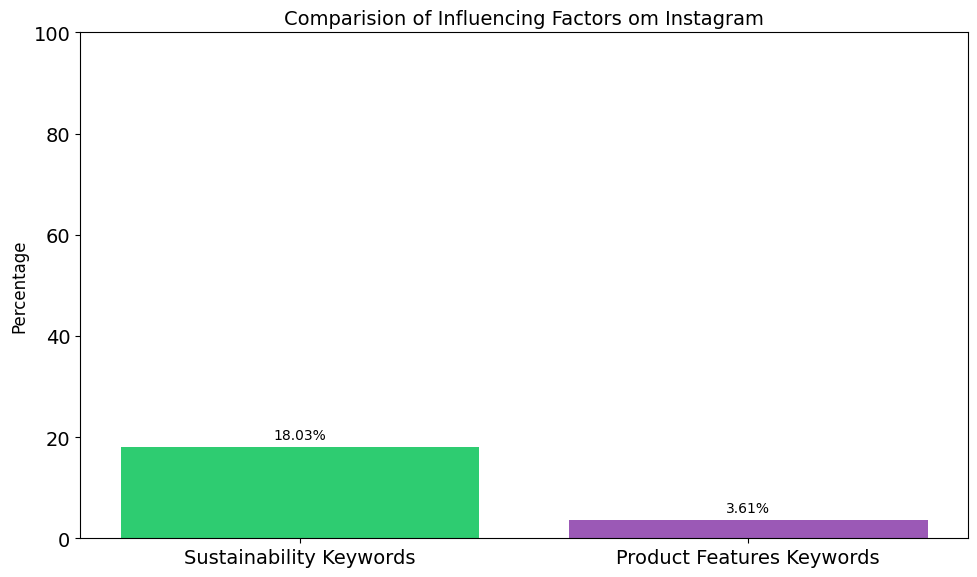

In [23]:
# Example percentages for demonstration
percentage_matching_rows = percentage_matching_rows3 # Percentage for sustainability Keywords
percentage_matching_rows2 = percentage_matching_rows4  # Percentage for product features Keywords

# Categories and percentages
categories = ['Sustainability Keywords', 'Product Features Keywords']
percentages = [percentage_matching_rows, percentage_matching_rows2]

# Define colors for the bars
colors = ['#2ecc71', '#9b59b6']  # Green for Sustainability, Purple for Product Features

# Plot the bar chart
plt.figure(figsize=(10, 6))
bars = plt.bar(categories, percentages, color=colors)

# Add percentage values on top of the bars
for bar, percentage in zip(bars, percentages):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 1, f"{percentage:.2f}%",
             ha='center', va='bottom', fontsize=10, color='black')

# Customize the chart
plt.title('Comparision of Influencing Factors om Instagram', fontsize=14)
plt.ylabel('Percentage', fontsize=12)
plt.ylim(0, 100)  # Limit y-axis to 0-100%
plt.tight_layout()
plt.show()


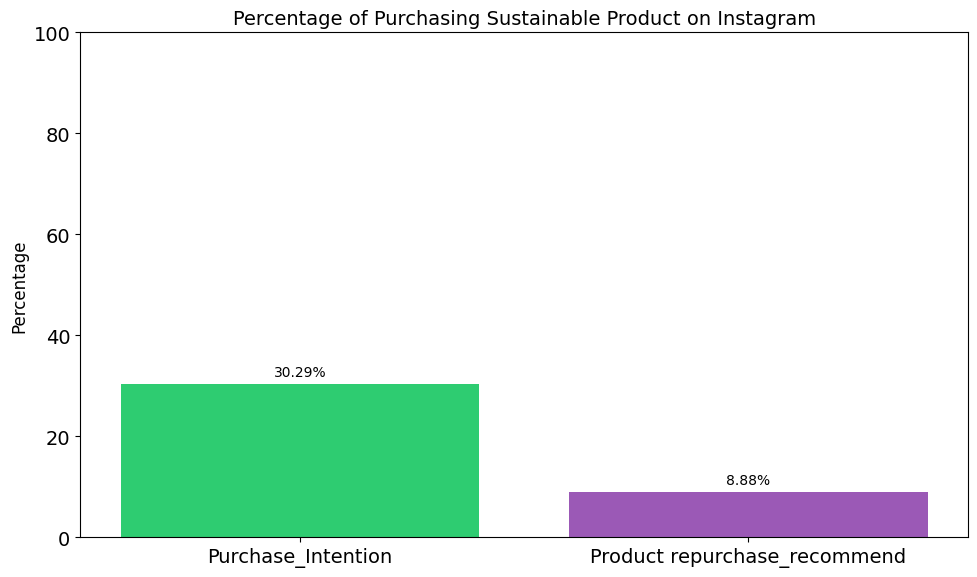

In [24]:
# Example percentages for demonstration
percentage_purchase_rows = percentage_matching_rows  # Percentage for repurchase recommen Keywords
percentage_repurchase_rows = percentage_matching_rows2 # Percentage for purchasd intention Keywords

# Categories and percentages
categories = ['Purchase_Intention', 'Product repurchase_recommend']
percentages = [Purchase_Intention_percentage, repurchase_recommend_percentage]

# Define colors for the bars
colors = ['#2ecc71', '#9b59b6']  # Green for Sustainability, Purple for Product Features

# Plot the bar chart
plt.figure(figsize=(10, 6))
bars = plt.bar(categories, percentages, color=colors)

# Add percentage values on top of the bars
for bar, percentage in zip(bars, percentages):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 1, f"{percentage:.2f}%",
             ha='center', va='bottom', fontsize=10, color='black')

# Customize the chart
plt.title('Percentage of Purchasing Sustainable Product on Instagram', fontsize=14)
plt.ylabel('Percentage', fontsize=12)
plt.ylim(0, 100)  # Limit y-axis to 0-100%
plt.tight_layout()
plt.show()


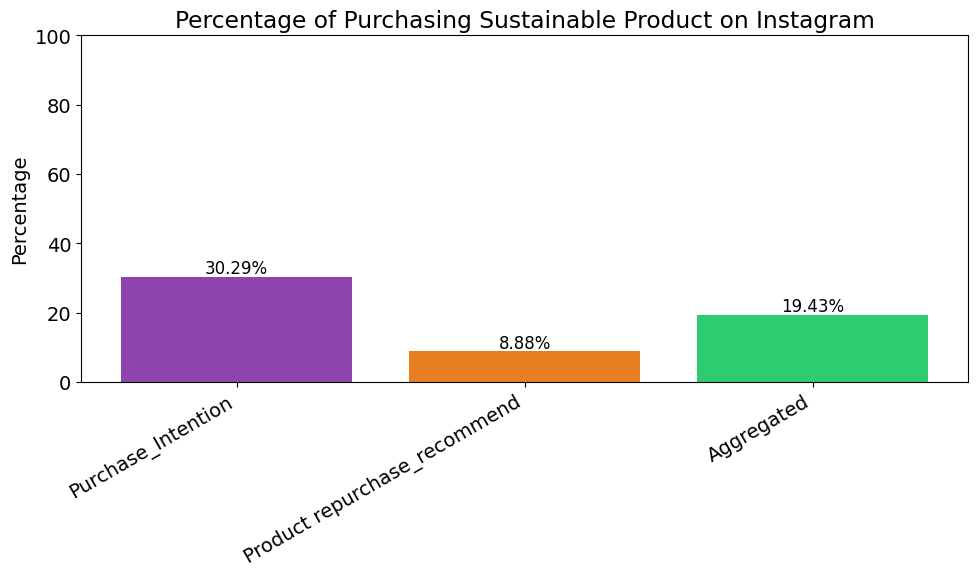

In [25]:
# Data for the chart
categories = ['Purchase_Intention', 'Product repurchase_recommend', 'Aggregated']
percentages = [Purchase_Intention_percentage, repurchase_recommend_percentage, aggregated_percentage]

# Define colors for each category
colors = ['#8e44ad', '#e67e22', '#2ecc71']  # Purple, Orange, Green

# Plot the bar chart
plt.figure(figsize=(10, 6))
plt.bar(categories, percentages, color=colors)

# Add percentage values on top of each column
for i, percentage in enumerate(percentages):
    plt.text(i, percentage + 1, f'{percentage:.2f}%', ha='center', fontsize=12)

# Rotate x-axis labels to prevent overlapping
plt.xticks(rotation=30, ha='right')  # Rotate labels by 30 degrees and align to the right

# Chart customization
plt.title('Percentage of Purchasing Sustainable Product on Instagram')
plt.ylabel('Percentage')
plt.ylim(0, 100)  # Limit y-axis to 0-100%
plt.tight_layout()  # Adjust layout to prevent clipping
plt.show()


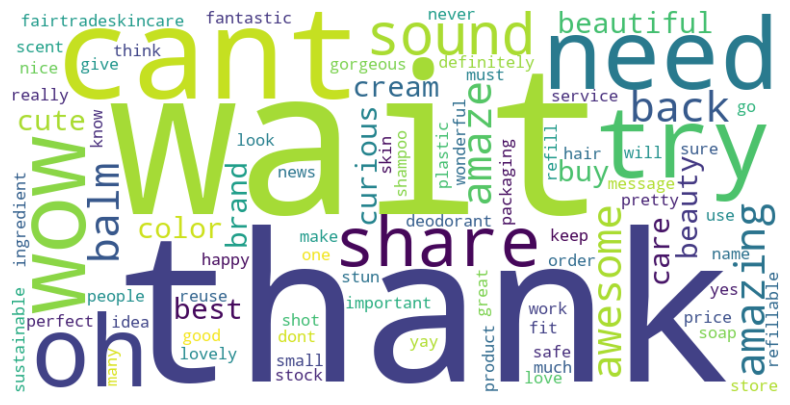

In [26]:
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(" ".join(Top_keywords))
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show() 

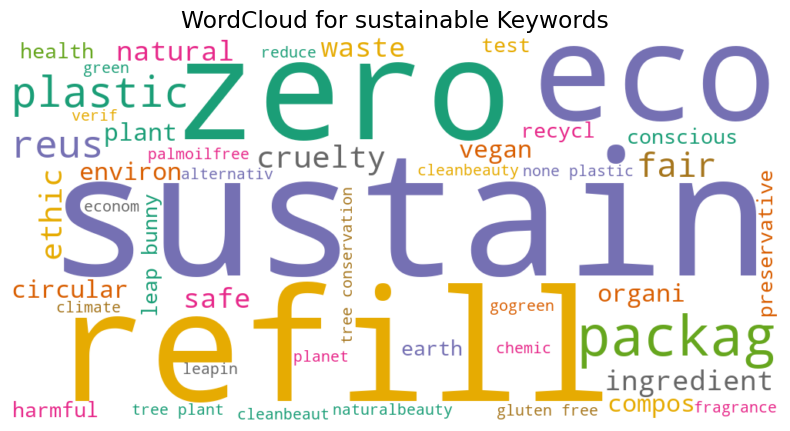

In [27]:
wordcloud = WordCloud(width=1000, height=500, background_color='white', colormap='Dark2').generate_from_frequencies(keyword_counts)

# Plot the WordCloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title("WordCloud for sustainable Keywords")
plt.show()

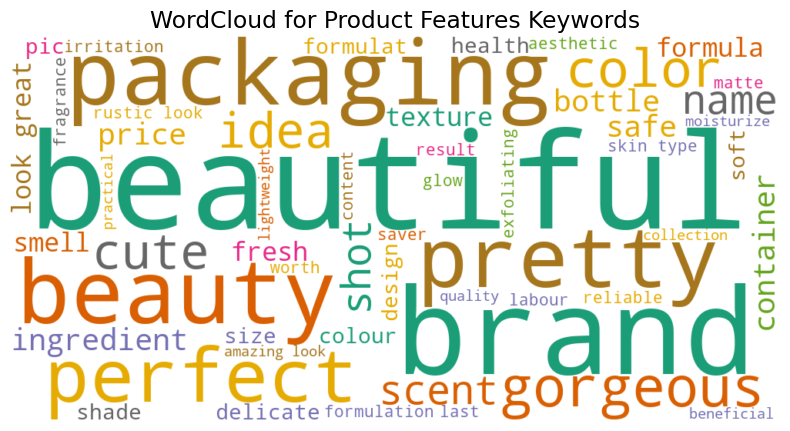

In [28]:
wordcloud = WordCloud(width=1000, height=500, background_color='white', colormap='Dark2').generate_from_frequencies(keyword_counts2)

# Plot the WordCloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title("WordCloud for Product Features Keywords")
plt.show()

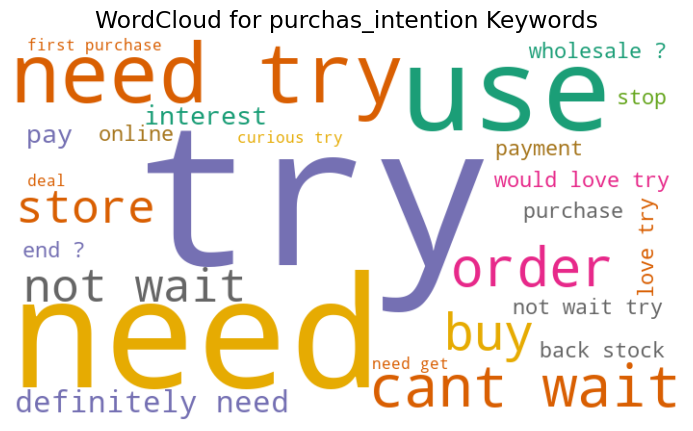

In [29]:
wordcloud = WordCloud(width=700, height=400, background_color='white', colormap='Dark2').generate_from_frequencies(keyword_counts3)

# Plot the WordCloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title("WordCloud for purchas_intention Keywords")
plt.show()

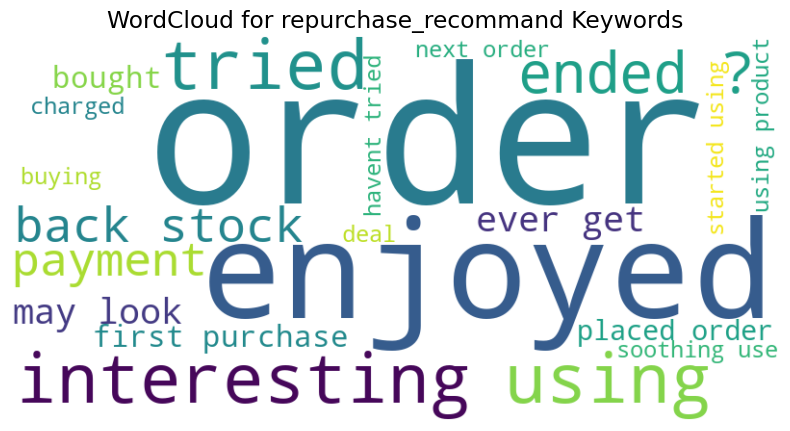

In [30]:
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(keyword_counts4)

# Plot the WordCloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title("WordCloud for repurchase_recommand Keywords")
plt.show()

In [31]:
# Categorized sustainability-related keywords
environmental_keywords = ["refillablecosmetics", "earthsustainable", "sustainablemakeup", "waste", "ecofriendlymakeup", 
    "plasticfree", "planet", "sustainability", "ecofriendlyproducts", "zerowastemakeup", "tree conservation", "refillablebeauty",
    "climate", "ecofriendlyliving", "compostable", "wastefree", "environmentally", "zerowasteliving", "refillablemakeup",
    "ecofriendlyskincare", "tree planting", "sustainable", "ecofriendly", "compostablelipbalm", "reuse", "refill",
    "recycledmaterials", "reduce", "zerowastecosmetics", "circularity", "gogreen", "planting", "refillable", "refillrevolution",
    "circulardesign", "plastic", "organicskincare", "eco", "recycle", "compostableskincare", "circularbeauty", 
    "green", "ecobeauty", "sustainableclothing", "packaging", "earth", "zerowastelifestyle", "zerowaste", "alternative",
    "reusable", "cleanbeauty", "environment", "refillableskincare", "zerowasteskincare", "zerowastestore", 
    "none plastic", "sustainablepackaging"]
social_keywords = ["fairtradeskincare", "consciousconsumer", "ethicalcompany", "ethicalskincare", "fairewholesale", 
    "crueltyfreeskincare", "veganbeauty", "cruelty", "sustainablebeauty", "conscious", "ethical", 
    "leapingbunnycertified", "crueltyfree", "social", "leap bunny", "vegan", "harmful", "safe", 
    "fragrance", "palmoilfreeskincare"]
economic_keywords = ["sustainablebusiness", "sustainablebrand", "testimony", "affordable", "cost", "economy", "consumerism"]

# Function to find matches for a keyword group in a comment
def find_matches(text, keywords):
    text = text.lower()
    matches = re.findall(r'\b(' + '|'.join(keywords) + r')\w*\b', text)
    return matches


# Convert dataset to a list
text_data = data['Lemmatized_Comments'].dropna().tolist()


# Initialize counters and match trackers
environmental_matches = []
social_matches = []
economic_matches = []


# Process each comment in the dataset
for comment in text_data:
    environmental_matches.extend(find_matches(comment, environmental_keywords))
    social_matches.extend(find_matches(comment, social_keywords))
    economic_matches.extend(find_matches(comment, economic_keywords))

# Count matches
environmental_count = len(environmental_matches)
social_count = len(social_matches)
economic_count = len(economic_matches)

# Total sustainability-related matches
total_sustainability_matches = environmental_count + social_count + economic_count

# Calculate percentages
environmental_percentage = (environmental_count / total_sustainability_matches) * 100 if total_sustainability_matches > 0 else 0
social_percentage = (social_count / total_sustainability_matches) * 100 if total_sustainability_matches > 0 else 0
economic_percentage = (economic_count / total_sustainability_matches) * 100 if total_sustainability_matches > 0 else 0

# Display results
print(f"Environmental Concern: {environmental_count} ({environmental_percentage:.2f}%)")
print(f"Social Concern: {social_count} ({social_percentage:.2f}%)")
print(f"Economic Concern: {economic_count} ({economic_percentage:.2f}%)")

# Display matched words
print("\nMatched Words:")
print(f"Environmental Matches: {environmental_matches}")
print(f"Social Matches: {social_matches}")
print(f"Economic Matches: {economic_matches}")

Environmental Concern: 116 (76.32%)
Social Concern: 33 (21.71%)
Economic Concern: 3 (1.97%)

Matched Words:
Environmental Matches: ['zerowaste', 'packaging', 'packaging', 'packaging', 'eco', 'packaging', 'eco', 'refill', 'refillablemakeup', 'refillablecosmetics', 'zerowastemakeup', 'zerowastecosmetics', 'refill', 'zerowaste', 'cleanbeauty', 'refill', 'sustainablemakeup', 'ecofriendlymakeup', 'zerowasteliving', 'zerowaste', 'plasticfree', 'zerowastelifestyle', 'refillablebeauty', 'sustainable', 'eco', 'refill', 'sustainable', 'sustainable', 'sustainable', 'zerowaste', 'plasticfree', 'ecofriendly', 'sustainable', 'gogreen', 'zerowastelifestyle', 'waste', 'zerowaste', 'refill', 'refill', 'planet', 'refill', 'tree planting', 'tree conservation', 'organicskincare', 'sustainable', 'compostable', 'compostable', 'sustainable', 'ecofriendlyskincare', 'organicskincare', 'earth', 'refill', 'waste', 'eco', 'sustainable', 'environmentally', 'circularbeauty', 'sustainable', 'sustainable', 'eco', 'ci

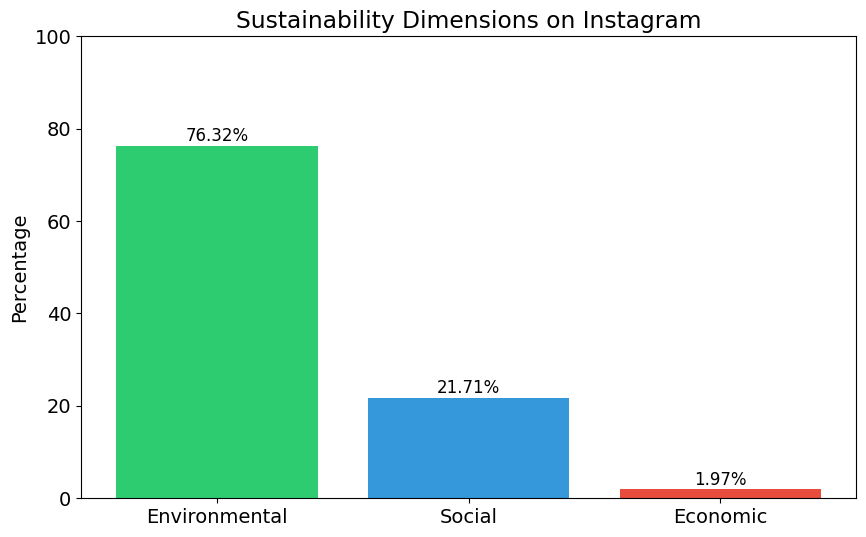

In [45]:
# Data for the chart
categories = ['Environmental', 'Social', 'Economic']
percentages = [environmental_percentage, social_percentage, economic_percentage]
colors = ['#2ecc71', '#3498db', '#e74c3c']  # Green for Environmental, Blue for Social, Red for Economic

# Plot the bar chart
plt.figure(figsize=(10, 6))
bars = plt.bar(categories, percentages, color=colors)

# Add percentage values on top of the bars
for bar, percentage in zip(bars, percentages):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 1, f"{percentage:.2f}%", ha='center', fontsize=12)

plt.title('Sustainability Dimensions on Instagram')
plt.ylabel('Percentage')
plt.ylim(0, 100)  
plt.show()

Keyword Matches by Product Feature Categories:
Longevity: 2 (1.36%)
Skin Type & Sensitivity: 4 (2.72%)
Scent and Fragrance: 8 (5.44%)
Aesthetic Appeal: 68 (46.26%)
Packaging and Usability: 19 (12.93%)
Product Quality & Performance: 10 (6.80%)
Value and Affordability: 5 (3.40%)
Hydration & Texture: 6 (4.08%)
Brand & Reputation: 25 (17.01%)

Matched Words by Category:
Longevity: ['saver', 'last']
Skin Type & Sensitivity: ['skin type', 'irritation', 'health', 'health']
Scent and Fragrance: ['scent', 'scent', 'smell', 'scent', 'fragrance', 'smell', 'scent', 'smell']
Aesthetic Appeal: ['look', 'pretty', 'pretty', 'beautiful', 'pretty', 'beautiful', 'cute', 'look', 'beautiful', 'beautiful', 'pretty', 'beautiful', 'rustic look', 'pretty', 'beautiful', 'look', 'look', 'gorgeous', 'pretty', 'beautiful', 'beautiful', 'beautiful', 'look', 'beautiful', 'glow', 'gorgeous', 'beautiful', 'pretty', 'beautiful', 'aesthetic', 'pretty', 'look', 'look', 'beautiful', 'gorgeous', 'look', 'beautiful', 'gorge

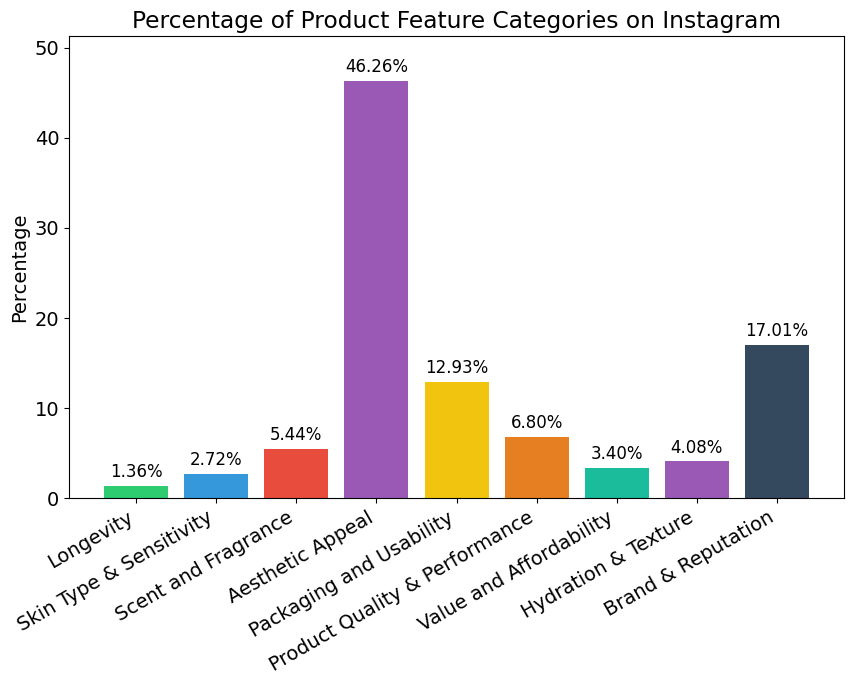

In [44]:
# Define categories and their keywords
categories = {
    "Longevity": ['last', 'lasting', 'long', 'longer', 'saver'],
    "Skin Type & Sensitivity": ['sensitive', 'sensitivity', 'oily', 'dry', 'hydrating', 'irritation', 'gentle', 'skin type', 'health', 'brightene', 'hydratin', 'comedo'],
    "Scent and Fragrance": ['scent', 'smell', 'fragrance', 'pleasant'],
    "Aesthetic Appeal":  ['beautiful', 'cute', 'pretty', 'look', 'amazing look', 'design', 'aesthetic', 'luxury', 
                                             'gorgeous', 'stunning', 'rustic look', 'glow'],
    "Packaging and Usability": ['packaging', 'container', 'tube', 'jar', 'lid', 'bottle', 'practical', 'simple'],
    "Product Quality & Performance": ['quality', 'performance', 'effective', 'formula', 'formulation', 'ingredient', 'improvement', 
                                      'dependable', 'reliable', 'result', 'availabilit', 'enhance', 'blendabl','absorb', 'molecular'],
    "Value and Affordability": ['price', 'expensive', 'cheap', 'overpric', 'reasonable', 'worth', 'value', 'cost', 'money'],
    "Hydration & Texture": ['moisturize', 'hydrating', 'hydration', 'soft', 'texture', 'softene', 'nourishing'],
    "Brand & Reputation": ['brand', 'beauty', 'esthetician']
}

# Function to find matches for a category
def find_matches(text, keywords):
    matches = re.findall(r'\b(' + '|'.join(keywords) + r')\w*\b', text.lower())
    return matches

# Initialize results
category_matches = {category: [] for category in categories}
category_counts = {category: 0 for category in categories}

# Process each comment
for comment in text_data:
    for category, keywords in categories.items():
        matches = find_matches(comment, keywords)
        category_matches[category].extend(matches)
        category_counts[category] += len(matches)

# Calculate total keyword frequency
total_keywords_found = sum(category_counts.values())

# Calculate percentages
category_percentages = {
    category: (count / total_keywords_found) * 100 if total_keywords_found > 0 else 0
    for category, count in category_counts.items()
}

# Display results
print("Keyword Matches by Product Feature Categories:")
for category, count in category_counts.items():
    print(f"{category}: {count} ({category_percentages[category]:.2f}%)")

# Display matched words
print("\nMatched Words by Category:")
for category, matches in category_matches.items():
    print(f"{category}: {matches}")
    

# Display results
#print("Keyword Matches by Product Feature Categories (with Percentages):")
#for category, count in category_counts.items():
#    print(f"{category}: {count} ({category_percentages[category]:.2f}%)")

# Prepare data for plotting
categories = list(category_percentages.keys())
percentages = list(category_percentages.values())

# Define colors for each category
colors = ['#2ecc71', '#3498db', '#e74c3c', '#9b59b6', '#f1c40f', '#e67e22', '#1abc9c', '#9b59b6', '#34495e']

# Plot the bar chart
plt.figure(figsize=(10, 6))
bars = plt.bar(categories, percentages, color=colors)

# Add percentage values on top of the bars
for bar, percentage in zip(bars, percentages):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 1, f"{percentage:.2f}%", ha='center', fontsize=12)

plt.title('Percentage of Product Feature Categories on Instagram')
plt.ylabel('Percentage')
plt.xticks(rotation=30, ha='right')  # Rotate labels to prevent overlap
plt.ylim(0, max(percentages) + 5)  # Adjust y-axis to ensure text fits
#plt.ylim(0, 100)  # Limit y-axis to 0-100%
plt.show()


Purchase Intention Keywords: ['back stock', 'buyless', 'love try', 'not wait', 'would love try', 'end', 'pay', 'online', 'userealstuff', 'curious try', 'useand', 'definitely need', 'need try', 'cant wait', 'wholesale', 'need get', 'order', 'purchase', 'store', 'stop', 'not wait try', 'first purchase', 'use', 'deal', 'payment', 'try', 'interest', 'need', 'buy']
Repurchase and Recommend Keywords: ['back stock', 'soothing useand', 'may look', 'triedba', 'ordered', 'next order', 'interesting', 'tried', 'ever get', 'buying', 'charged', 'order', 'started using', 'bought', 'using', 'first purchase', 'ended', 'placed order', 'deal', 'enjoyed', 'payment', 'havent tried', 'using product']
Sustainability Keywords: ['sustainablelivingblogger', 'verify', 'sustainablelivingblog', 'sustainableskincare', 'zerowasteliving', 'wasted', 'zerowastecosmetics', 'reusable', 'compostable', 'sustainable', 'ethicalcompany', 'refillablebeauty', 'crueltyfreeskincare', 'zerowastelifestyle', 'sustainableclothing', '

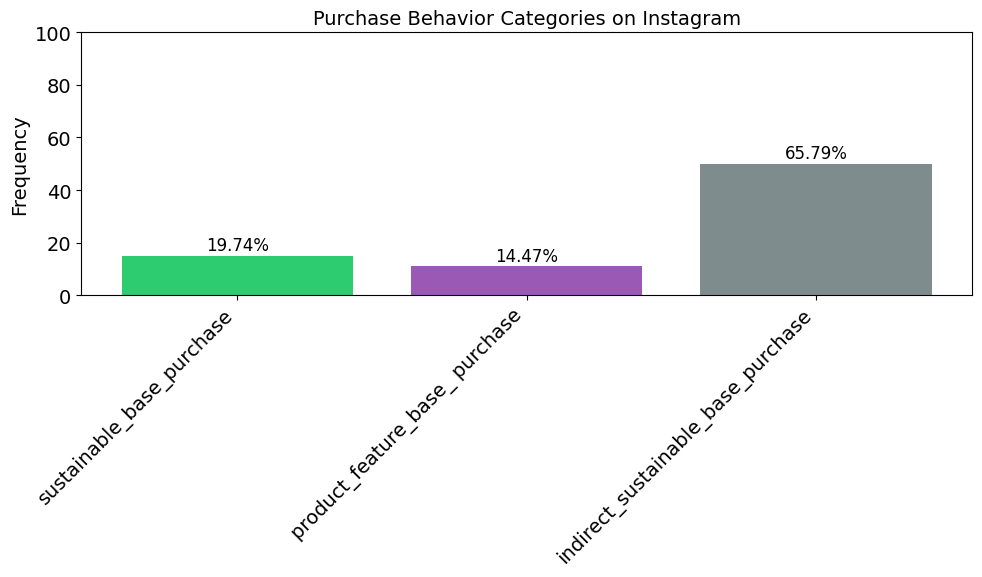

Categorized Results:
                                               comment  \
0                                               end ?   
1                                   will back stock ?   
2                                        ohh need try   
3                                     thank cant wait   
4   brand mevery interest potato starch packaging ...   
..                                                ...   
71  love much not wait get set refillable bottle t...   
72                    add list clean beauty brand try   
73  brand look amaze definitely need try tint mois...   
74     charge card but say payment couldnt verify ? ?   
75  thank girl really excited price seem good true...   

                              category  
0   indirect_sustainable_base_purchase  
1   indirect_sustainable_base_purchase  
2   indirect_sustainable_base_purchase  
3   indirect_sustainable_base_purchase  
4            sustainable_base_purchase  
..                                 ...  
71    

In [42]:
# Assign dynamically
keywords_to_extract_Purchase_Intention = list(set(all_unique_words_list3))
keywords_to_extract_repurchase_recommand = list(set(all_unique_words_list4))
keywords_to_extract_sustainability = list(set(all_unique_words_list))
keywords_to_extract_product_feature = list(set(all_unique_words_list2))

# Display unique keywords
print("Purchase Intention Keywords:", keywords_to_extract_Purchase_Intention)
print("Repurchase and Recommend Keywords:", keywords_to_extract_repurchase_recommand)
print("Sustainability Keywords:", keywords_to_extract_sustainability)
print("Product Feature Keywords:", keywords_to_extract_product_feature)


# Function to check for keywords in a comment
def contains_keywords(text, keywords):
    text = text.lower()
    return any(re.search(rf'\b{keyword}\w*\b', text) for keyword in keywords)

# Convert dataset comments into a list
text_data = data['Lemmatized_Comments'].dropna().tolist()

# Categorize comments
results = []
for comment in text_data:
    # Check if the comment shows purchase behavior
    purchase_behavior = contains_keywords(comment, keywords_to_extract_Purchase_Intention) or \
                        contains_keywords(comment, keywords_to_extract_repurchase_recommand)
    
    # Only process comments with purchase behavior
    if purchase_behavior:
        # Check for sustainability or product feature keywords
        if contains_keywords(comment, keywords_to_extract_sustainability):
            results.append({'comment': comment, 'category': 'sustainable_base_purchase'})
        elif contains_keywords(comment, keywords_to_extract_product_feature):
            results.append({'comment': comment, 'category': 'product_feature_base_ purchase'})
        else:
            results.append({'comment': comment, 'category': 'indirect_sustainable_base_purchase'})

# Convert results to DataFrame
results_df = pd.DataFrame(results)

# Calculate frequencies and percentages for each category
total_comments = len(results_df)
category_counts = results_df['category'].value_counts()
category_percentages = (category_counts / total_comments) * 100

# Data for plotting
categories = ['sustainable_base_purchase', 'product_feature_base_ purchase', 'indirect_sustainable_base_purchase']
frequencies = [category_counts.get(category, 0) for category in categories]
percentages = [category_percentages.get(category, 0) for category in categories]

# Plot the bar chart
plt.figure(figsize=(10, 6))
bars = plt.bar(categories, frequencies, color=['#2ecc71', '#9b59b6', '#7f8c8d'])

# Add percentage values on top of each bar
for bar, percentage in zip(bars, percentages):
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height + 0.5, f"{percentage:.2f}%",
             ha='center', va='bottom', fontsize=12, color='black')

# Customize the chart
plt.title('Purchase Behavior Categories on Instagram', fontsize=14)

plt.ylabel('Frequency', fontsize=14)
plt.xticks(rotation=45, ha='right', fontsize=14)
plt.tight_layout()
plt.ylim(0, 100)  # Limit y-axis to 0-100%
plt.show()

# Display results
print("Categorized Results:\n", results_df)
print("\nCategory Frequencies:\n", category_counts)
print("\nCategory Percentages:\n", category_percentages)
print("\ntotal_comments:\n", total_comments)

In [28]:

# Function to check for keywords in a comment
def contains_keywords(text, keywords):
    text = text.lower()
    return any(re.search(rf'\b{keyword}\w*\b', text) for keyword in keywords)

# Convert dataset comments into a list
text_data = data['Lemmatized_Comments'].dropna().tolist()

# Categorize comments
results = []
for comment in text_data:
    # Check if the comment has purchase behavior
    purchase_behavior = contains_keywords(comment, keywords_to_extract_Purchase_Intention) or \
                        contains_keywords(comment, keywords_to_extract_repurchase_recommand)
    
    if purchase_behavior:
        # Check for sustainability or product feature keywords
        if contains_keywords(comment, keywords_to_extract_sustainability):
            results.append({'comment': comment, 'category': 'sustainable_base_purchase'})
        elif contains_keywords(comment, keywords_to_extract_product_feature):
            results.append({'comment': comment, 'category': 'feature_base_behavior'})
        else:
            # Categorize as indirect intention if none of the above matches
            results.append({'comment': comment, 'category': 'indirect_intention'})
    else:
        # Categorize as indirect intention if no purchase behavior is detected
        results.append({'comment': comment, 'category': 'indirect_intention'})

# Convert results to DataFrame 
import pandas as pd
results_df = pd.DataFrame(results)

# Display categorized results
print(results_df)


                                      comment            category
0    look nourish perfect keep lips soft cool  indirect_intention
1                                      pretty  indirect_intention
2                                 labour love  indirect_intention
3                                         wow  indirect_intention
4                             oh soooo pretty  indirect_intention
..                                        ...                 ...
411                            all best brand  indirect_intention
412                            right ? ? love  indirect_intention
413                                     woooo  indirect_intention
414                       julep gluten free ?  indirect_intention
415         leapingbunnycertified crueltyfree  indirect_intention

[416 rows x 2 columns]


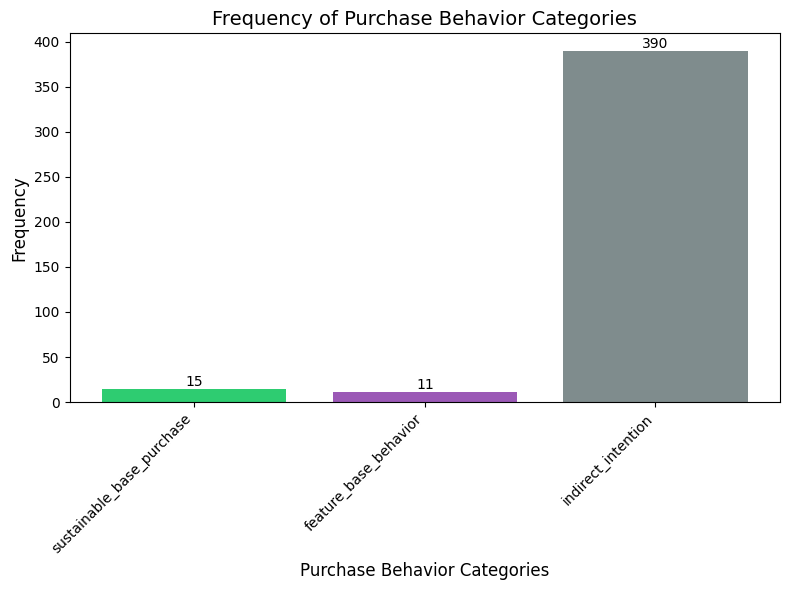

In [29]:
# Calculate frequencies for each category
category_counts = results_df['category'].value_counts().to_dict()

# Data for plotting
categories = ['sustainable_base_purchase', 'feature_base_behavior', 'indirect_intention']
frequencies = [category_counts.get(category, 0) for category in categories]

# Plot the bar chart
plt.figure(figsize=(8, 6))  # Adjust figure size for better readability
bars = plt.bar(categories, frequencies, color=['#2ecc71', '#9b59b6', '#7f8c8d'])  

# Add the frequency values on top of each bar
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height, str(height),
             ha='center', va='bottom', fontsize=10, color='black')  

# Customize the chart
plt.title('Frequency of Purchase Behavior Categories', fontsize=14)
plt.xlabel('Purchase Behavior Categories', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.tight_layout()
plt.show()


In [34]:
plt.savefig("purchase_behavior_frequencies.png")

<Figure size 640x480 with 0 Axes>